- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼 때
np.random.seed(4)

In [2]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [3]:
print(data[0].shape)
print(data[0,0])
print(data[0,1:].reshape(28,28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [4]:
# # 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [5]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

3.0

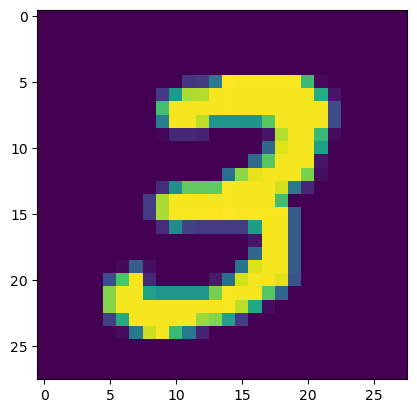

In [6]:
plt.imshow(data[7,1:].reshape(28,-1))
data[7,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

## 1. 데이터 생성& 전처리

In [7]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
for row in X_train[1]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

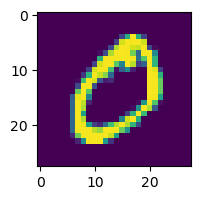

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])
plt.show()

In [10]:
Y_train[1]

0

In [11]:
# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [12]:
# 훈련셋,검증셋 => 학습시(fit에서) 사용, 시험셋(평가시 사용)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [13]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [14]:
# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((700, 784), (700,), (300, 784), (300,))

9


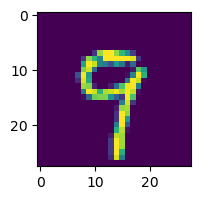

In [15]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[5].reshape(-1,28))
print(Y_train[5])
plt.show()

In [16]:
# 종속변수 전처리 : 원핫인코딩 (to_categorical pd.get_dummies(데이터프레임))
print('원핫인코딩 전 shape :',Y_train.shape, Y_val.shape, Y_test.shape)
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)
print('원핫인코딩 후 shape:', Y_train.shape, Y_val.shape, Y_test.shape)

원핫인코딩 전 shape : (700,) (300,) (10000,)
원핫인코딩 후 shape: (700, 10) (300, 10) (10000, 10)


In [17]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 2. 모델구성하기

In [19]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [21]:
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                 validation_data=(X_val,Y_val))

Epoch 1/1200
7/7 [==============================] - 1s 46ms/step - loss: 2.2943 - accuracy: 0.1043 - val_loss: 2.2788 - val_accuracy: 0.1200
Epoch 2/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2707 - accuracy: 0.1514 - val_loss: 2.2526 - val_accuracy: 0.1167
Epoch 3/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2460 - accuracy: 0.1671 - val_loss: 2.2277 - val_accuracy: 0.1233
Epoch 4/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2178 - accuracy: 0.1671 - val_loss: 2.1905 - val_accuracy: 0.1433
Epoch 5/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1806 - accuracy: 0.1786 - val_loss: 2.1537 - val_accuracy: 0.1700
Epoch 6/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1444 - accuracy: 0.1771 - val_loss: 2.1224 - val_accuracy: 0.1900
Epoch 7/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.1131 - accuracy: 0.1829 - val_loss: 2.0962 - val_accuracy: 0.2000
Epoch 8/1200
7/7 [=

7/7 [==============================] - 0s 6ms/step - loss: 1.5296 - accuracy: 0.4600 - val_loss: 1.5866 - val_accuracy: 0.4033
Epoch 60/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5220 - accuracy: 0.4729 - val_loss: 1.5805 - val_accuracy: 0.4100
Epoch 61/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5155 - accuracy: 0.4686 - val_loss: 1.5744 - val_accuracy: 0.4200
Epoch 62/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5086 - accuracy: 0.4729 - val_loss: 1.5686 - val_accuracy: 0.4167
Epoch 63/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.5017 - accuracy: 0.4729 - val_loss: 1.5625 - val_accuracy: 0.4233
Epoch 64/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4948 - accuracy: 0.4786 - val_loss: 1.5568 - val_accuracy: 0.4300
Epoch 65/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4878 - accuracy: 0.4800 - val_loss: 1.5502 - val_accuracy: 0.4300
Epoch 66/1200
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 1.2444 - accuracy: 0.5157 - val_loss: 1.3532 - val_accuracy: 0.4700
Epoch 118/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2416 - accuracy: 0.5186 - val_loss: 1.3517 - val_accuracy: 0.4667
Epoch 119/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2378 - accuracy: 0.5171 - val_loss: 1.3501 - val_accuracy: 0.4667
Epoch 120/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2348 - accuracy: 0.5186 - val_loss: 1.3469 - val_accuracy: 0.4667
Epoch 121/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2313 - accuracy: 0.5229 - val_loss: 1.3452 - val_accuracy: 0.4667
Epoch 122/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2279 - accuracy: 0.5214 - val_loss: 1.3427 - val_accuracy: 0.4667
Epoch 123/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.2256 - accuracy: 0.5186 - val_loss: 1.3403 - val_accuracy: 0.4667
Epoch 124/1200
7/7 [=

Epoch 175/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0944 - accuracy: 0.5629 - val_loss: 1.2721 - val_accuracy: 0.4733
Epoch 176/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0923 - accuracy: 0.5629 - val_loss: 1.2714 - val_accuracy: 0.4733
Epoch 177/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0906 - accuracy: 0.5700 - val_loss: 1.2719 - val_accuracy: 0.4733
Epoch 178/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0883 - accuracy: 0.5629 - val_loss: 1.2692 - val_accuracy: 0.4733
Epoch 179/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0866 - accuracy: 0.5600 - val_loss: 1.2689 - val_accuracy: 0.4733
Epoch 180/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0844 - accuracy: 0.5614 - val_loss: 1.2683 - val_accuracy: 0.4733
Epoch 181/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0831 - accuracy: 0.5671 - val_loss: 1.2677 - val_accuracy: 0.4733
Epoch 

Epoch 233/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0008 - accuracy: 0.5957 - val_loss: 1.2448 - val_accuracy: 0.4767
Epoch 234/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9992 - accuracy: 0.5900 - val_loss: 1.2430 - val_accuracy: 0.4733
Epoch 235/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9978 - accuracy: 0.5900 - val_loss: 1.2430 - val_accuracy: 0.4733
Epoch 236/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9969 - accuracy: 0.5957 - val_loss: 1.2439 - val_accuracy: 0.4767
Epoch 237/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9955 - accuracy: 0.6043 - val_loss: 1.2445 - val_accuracy: 0.4733
Epoch 238/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9941 - accuracy: 0.6043 - val_loss: 1.2427 - val_accuracy: 0.4733
Epoch 239/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9931 - accuracy: 0.6057 - val_loss: 1.2440 - val_accuracy: 0.4733
Epoch 

Epoch 291/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9288 - accuracy: 0.6257 - val_loss: 1.2421 - val_accuracy: 0.5033
Epoch 292/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9286 - accuracy: 0.6314 - val_loss: 1.2442 - val_accuracy: 0.5033
Epoch 293/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9272 - accuracy: 0.6300 - val_loss: 1.2438 - val_accuracy: 0.5000
Epoch 294/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9257 - accuracy: 0.6343 - val_loss: 1.2446 - val_accuracy: 0.5033
Epoch 295/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9244 - accuracy: 0.6314 - val_loss: 1.2463 - val_accuracy: 0.5000
Epoch 296/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9229 - accuracy: 0.6343 - val_loss: 1.2462 - val_accuracy: 0.5067
Epoch 297/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9228 - accuracy: 0.6371 - val_loss: 1.2455 - val_accuracy: 0.5033
Epoch 

Epoch 349/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8731 - accuracy: 0.6629 - val_loss: 1.2646 - val_accuracy: 0.5133
Epoch 350/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8720 - accuracy: 0.6643 - val_loss: 1.2672 - val_accuracy: 0.5033
Epoch 351/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8712 - accuracy: 0.6614 - val_loss: 1.2663 - val_accuracy: 0.5033
Epoch 352/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8702 - accuracy: 0.6657 - val_loss: 1.2689 - val_accuracy: 0.5067
Epoch 353/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8698 - accuracy: 0.6600 - val_loss: 1.2658 - val_accuracy: 0.5167
Epoch 354/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8687 - accuracy: 0.6629 - val_loss: 1.2668 - val_accuracy: 0.5100
Epoch 355/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8675 - accuracy: 0.6671 - val_loss: 1.2688 - val_accuracy: 0.5100
Epoch 

Epoch 407/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8270 - accuracy: 0.6743 - val_loss: 1.3052 - val_accuracy: 0.5100
Epoch 408/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8269 - accuracy: 0.6757 - val_loss: 1.3049 - val_accuracy: 0.5133
Epoch 409/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8261 - accuracy: 0.6771 - val_loss: 1.3062 - val_accuracy: 0.5100
Epoch 410/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8250 - accuracy: 0.6757 - val_loss: 1.3097 - val_accuracy: 0.5100
Epoch 411/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8242 - accuracy: 0.6757 - val_loss: 1.3085 - val_accuracy: 0.5100
Epoch 412/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8232 - accuracy: 0.6743 - val_loss: 1.3114 - val_accuracy: 0.5100
Epoch 413/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.8225 - accuracy: 0.6757 - val_loss: 1.3076 - val_accuracy: 0.5133
Epoch 

Epoch 465/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7885 - accuracy: 0.6900 - val_loss: 1.3558 - val_accuracy: 0.5233
Epoch 466/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7880 - accuracy: 0.6871 - val_loss: 1.3580 - val_accuracy: 0.5233
Epoch 467/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7873 - accuracy: 0.6886 - val_loss: 1.3484 - val_accuracy: 0.5267
Epoch 468/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7870 - accuracy: 0.6886 - val_loss: 1.3575 - val_accuracy: 0.5267
Epoch 469/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7859 - accuracy: 0.6871 - val_loss: 1.3573 - val_accuracy: 0.5233
Epoch 470/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7853 - accuracy: 0.6871 - val_loss: 1.3595 - val_accuracy: 0.5200
Epoch 471/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7846 - accuracy: 0.6929 - val_loss: 1.3590 - val_accuracy: 0.5233
Epoch 

Epoch 523/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7548 - accuracy: 0.7071 - val_loss: 1.4006 - val_accuracy: 0.5267
Epoch 524/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7541 - accuracy: 0.7086 - val_loss: 1.3975 - val_accuracy: 0.5333
Epoch 525/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7536 - accuracy: 0.7100 - val_loss: 1.4078 - val_accuracy: 0.5267
Epoch 526/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7535 - accuracy: 0.7043 - val_loss: 1.4006 - val_accuracy: 0.5233
Epoch 527/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7528 - accuracy: 0.7086 - val_loss: 1.4016 - val_accuracy: 0.5300
Epoch 528/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7517 - accuracy: 0.7086 - val_loss: 1.4086 - val_accuracy: 0.5267
Epoch 529/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7516 - accuracy: 0.7086 - val_loss: 1.4123 - val_accuracy: 0.5233
Epoch 

Epoch 581/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7246 - accuracy: 0.7186 - val_loss: 1.4633 - val_accuracy: 0.5167
Epoch 582/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7243 - accuracy: 0.7214 - val_loss: 1.4555 - val_accuracy: 0.5133
Epoch 583/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7237 - accuracy: 0.7186 - val_loss: 1.4557 - val_accuracy: 0.5167
Epoch 584/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7233 - accuracy: 0.7200 - val_loss: 1.4536 - val_accuracy: 0.5167
Epoch 585/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7230 - accuracy: 0.7200 - val_loss: 1.4569 - val_accuracy: 0.5133
Epoch 586/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7224 - accuracy: 0.7214 - val_loss: 1.4631 - val_accuracy: 0.5133
Epoch 587/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7215 - accuracy: 0.7229 - val_loss: 1.4609 - val_accuracy: 0.5133
Epoch 

Epoch 639/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6976 - accuracy: 0.7300 - val_loss: 1.5067 - val_accuracy: 0.5100
Epoch 640/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6972 - accuracy: 0.7286 - val_loss: 1.5132 - val_accuracy: 0.5100
Epoch 641/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6971 - accuracy: 0.7286 - val_loss: 1.5093 - val_accuracy: 0.5100
Epoch 642/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6965 - accuracy: 0.7329 - val_loss: 1.5136 - val_accuracy: 0.5067
Epoch 643/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.7343 - val_loss: 1.5051 - val_accuracy: 0.5167
Epoch 644/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6958 - accuracy: 0.7314 - val_loss: 1.5121 - val_accuracy: 0.5000
Epoch 645/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6952 - accuracy: 0.7314 - val_loss: 1.5208 - val_accuracy: 0.5033
Epoch 

Epoch 697/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6738 - accuracy: 0.7429 - val_loss: 1.5671 - val_accuracy: 0.5067
Epoch 698/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.7400 - val_loss: 1.5724 - val_accuracy: 0.5100
Epoch 699/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6731 - accuracy: 0.7400 - val_loss: 1.5637 - val_accuracy: 0.5100
Epoch 700/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.7400 - val_loss: 1.5722 - val_accuracy: 0.5067
Epoch 701/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6723 - accuracy: 0.7414 - val_loss: 1.5700 - val_accuracy: 0.5067
Epoch 702/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6723 - accuracy: 0.7429 - val_loss: 1.5690 - val_accuracy: 0.5100
Epoch 703/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6719 - accuracy: 0.7443 - val_loss: 1.5739 - val_accuracy: 0.5100
Epoch 

Epoch 755/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6511 - accuracy: 0.7486 - val_loss: 1.6335 - val_accuracy: 0.5100
Epoch 756/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.7486 - val_loss: 1.6306 - val_accuracy: 0.5133
Epoch 757/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6499 - accuracy: 0.7500 - val_loss: 1.6325 - val_accuracy: 0.5100
Epoch 758/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6495 - accuracy: 0.7500 - val_loss: 1.6338 - val_accuracy: 0.5167
Epoch 759/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6496 - accuracy: 0.7500 - val_loss: 1.6309 - val_accuracy: 0.5100
Epoch 760/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6490 - accuracy: 0.7514 - val_loss: 1.6447 - val_accuracy: 0.5067
Epoch 761/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6491 - accuracy: 0.7486 - val_loss: 1.6294 - val_accuracy: 0.5167
Epoch 

Epoch 813/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6303 - accuracy: 0.7543 - val_loss: 1.6938 - val_accuracy: 0.5067
Epoch 814/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6297 - accuracy: 0.7543 - val_loss: 1.6978 - val_accuracy: 0.5100
Epoch 815/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6296 - accuracy: 0.7571 - val_loss: 1.6947 - val_accuracy: 0.5133
Epoch 816/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6290 - accuracy: 0.7586 - val_loss: 1.6958 - val_accuracy: 0.5100
Epoch 817/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6288 - accuracy: 0.7571 - val_loss: 1.6918 - val_accuracy: 0.5133
Epoch 818/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6288 - accuracy: 0.7571 - val_loss: 1.6985 - val_accuracy: 0.5100
Epoch 819/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6280 - accuracy: 0.7543 - val_loss: 1.6977 - val_accuracy: 0.5100
Epoch 

Epoch 871/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6110 - accuracy: 0.7671 - val_loss: 1.7508 - val_accuracy: 0.5100
Epoch 872/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6105 - accuracy: 0.7643 - val_loss: 1.7553 - val_accuracy: 0.5133
Epoch 873/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6102 - accuracy: 0.7657 - val_loss: 1.7554 - val_accuracy: 0.5100
Epoch 874/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6108 - accuracy: 0.7686 - val_loss: 1.7582 - val_accuracy: 0.5100
Epoch 875/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6101 - accuracy: 0.7671 - val_loss: 1.7569 - val_accuracy: 0.5100
Epoch 876/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6095 - accuracy: 0.7686 - val_loss: 1.7640 - val_accuracy: 0.5100
Epoch 877/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6091 - accuracy: 0.7686 - val_loss: 1.7562 - val_accuracy: 0.5133
Epoch 

Epoch 929/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.5948 - accuracy: 0.7729 - val_loss: 1.8212 - val_accuracy: 0.5067
Epoch 930/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5942 - accuracy: 0.7729 - val_loss: 1.8250 - val_accuracy: 0.5067
Epoch 931/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5943 - accuracy: 0.7729 - val_loss: 1.8191 - val_accuracy: 0.5067
Epoch 932/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5939 - accuracy: 0.7729 - val_loss: 1.8236 - val_accuracy: 0.5067
Epoch 933/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5932 - accuracy: 0.7729 - val_loss: 1.8273 - val_accuracy: 0.5067
Epoch 934/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5934 - accuracy: 0.7743 - val_loss: 1.8291 - val_accuracy: 0.5067
Epoch 935/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5931 - accuracy: 0.7714 - val_loss: 1.8378 - val_accuracy: 0.5067
Epoch 

Epoch 987/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5772 - accuracy: 0.7786 - val_loss: 1.9083 - val_accuracy: 0.5033
Epoch 988/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5772 - accuracy: 0.7786 - val_loss: 1.9040 - val_accuracy: 0.5000
Epoch 989/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5767 - accuracy: 0.7786 - val_loss: 1.8990 - val_accuracy: 0.5000
Epoch 990/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5764 - accuracy: 0.7771 - val_loss: 1.9053 - val_accuracy: 0.5033
Epoch 991/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5761 - accuracy: 0.7771 - val_loss: 1.9048 - val_accuracy: 0.5033
Epoch 992/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5763 - accuracy: 0.7786 - val_loss: 1.9135 - val_accuracy: 0.5000
Epoch 993/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5757 - accuracy: 0.7786 - val_loss: 1.9043 - val_accuracy: 0.5033
Epoch 

7/7 [==============================] - 0s 6ms/step - loss: 0.5634 - accuracy: 0.7829 - val_loss: 1.9809 - val_accuracy: 0.5000
Epoch 1045/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5633 - accuracy: 0.7829 - val_loss: 1.9728 - val_accuracy: 0.4967
Epoch 1046/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5632 - accuracy: 0.7814 - val_loss: 1.9883 - val_accuracy: 0.4967
Epoch 1047/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5629 - accuracy: 0.7800 - val_loss: 1.9853 - val_accuracy: 0.5000
Epoch 1048/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5623 - accuracy: 0.7786 - val_loss: 1.9787 - val_accuracy: 0.5033
Epoch 1049/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5626 - accuracy: 0.7829 - val_loss: 1.9750 - val_accuracy: 0.5033
Epoch 1050/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5622 - accuracy: 0.7843 - val_loss: 1.9890 - val_accuracy: 0.4933
Epoch 1051/1200

7/7 [==============================] - 0s 7ms/step - loss: 0.5512 - accuracy: 0.7871 - val_loss: 2.0571 - val_accuracy: 0.4933
Epoch 1102/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5506 - accuracy: 0.7857 - val_loss: 2.0622 - val_accuracy: 0.4967
Epoch 1103/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5504 - accuracy: 0.7871 - val_loss: 2.0673 - val_accuracy: 0.4900
Epoch 1104/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5500 - accuracy: 0.7886 - val_loss: 2.0657 - val_accuracy: 0.4967
Epoch 1105/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5498 - accuracy: 0.7871 - val_loss: 2.0710 - val_accuracy: 0.4967
Epoch 1106/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5498 - accuracy: 0.7871 - val_loss: 2.0719 - val_accuracy: 0.4933
Epoch 1107/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5492 - accuracy: 0.7886 - val_loss: 2.0814 - val_accuracy: 0.4900
Epoch 1108/1200

7/7 [==============================] - 0s 7ms/step - loss: 0.5388 - accuracy: 0.7886 - val_loss: 2.1481 - val_accuracy: 0.4967
Epoch 1159/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5388 - accuracy: 0.7886 - val_loss: 2.1566 - val_accuracy: 0.4933
Epoch 1160/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5383 - accuracy: 0.7886 - val_loss: 2.1487 - val_accuracy: 0.4967
Epoch 1161/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5381 - accuracy: 0.7886 - val_loss: 2.1633 - val_accuracy: 0.4933
Epoch 1162/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5381 - accuracy: 0.7900 - val_loss: 2.1540 - val_accuracy: 0.4933
Epoch 1163/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5377 - accuracy: 0.7886 - val_loss: 2.1562 - val_accuracy: 0.4933
Epoch 1164/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5377 - accuracy: 0.7871 - val_loss: 2.1702 - val_accuracy: 0.4967
Epoch 1165/1200

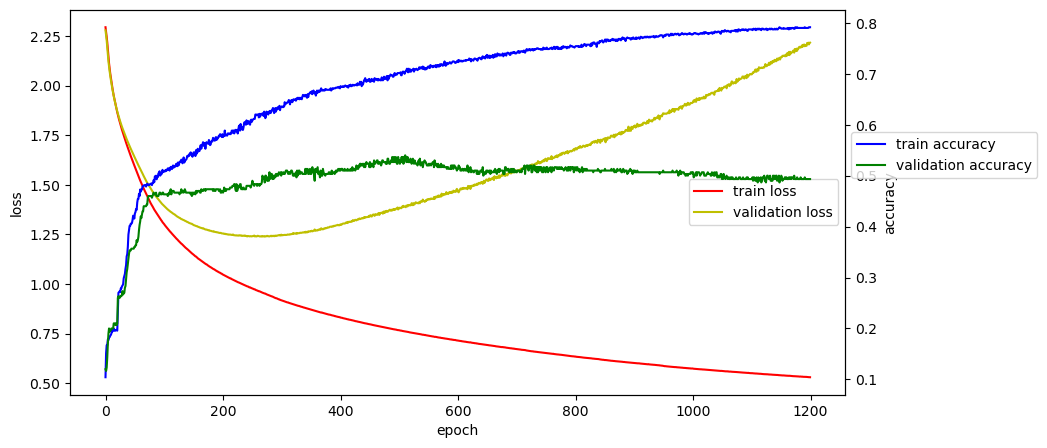

In [22]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수1

In [30]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 에코크 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                 format(self.epoch,
                        logs.get('loss'),
                        logs.get('accuracy'),
                        logs.get('val_loss'),
                        logs.get('val_accuracy')
                       ))

In [34]:
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습(콜백 적용)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                 validation_data=(X_val,Y_val),
                 verbose=0,
                 callbacks=[customHistory])

epoch:50, loss:1.652479648590088, acc:0.4099999964237213, val_loss:1.7103735208511353, val_acc:0.3733333349227905
epoch:100, loss:1.4309241771697998, acc:0.49142858386039734, val_loss:1.5525282621383667, val_acc:0.4699999988079071
epoch:150, loss:1.2917667627334595, acc:0.5357142686843872, val_loss:1.4851958751678467, val_acc:0.4833333194255829
epoch:200, loss:1.1767170429229736, acc:0.6128571629524231, val_loss:1.452831506729126, val_acc:0.4866666793823242
epoch:250, loss:1.092289686203003, acc:0.6485714316368103, val_loss:1.458858847618103, val_acc:0.47333332896232605
epoch:300, loss:1.0238689184188843, acc:0.6742857098579407, val_loss:1.476354718208313, val_acc:0.476666659116745
epoch:350, loss:0.9639155864715576, acc:0.7014285922050476, val_loss:1.5020095109939575, val_acc:0.47999998927116394
epoch:400, loss:0.9128687977790833, acc:0.7128571271896362, val_loss:1.5342637300491333, val_acc:0.47999998927116394
epoch:450, loss:0.8681761622428894, acc:0.7185714244842529, val_loss:1.5752

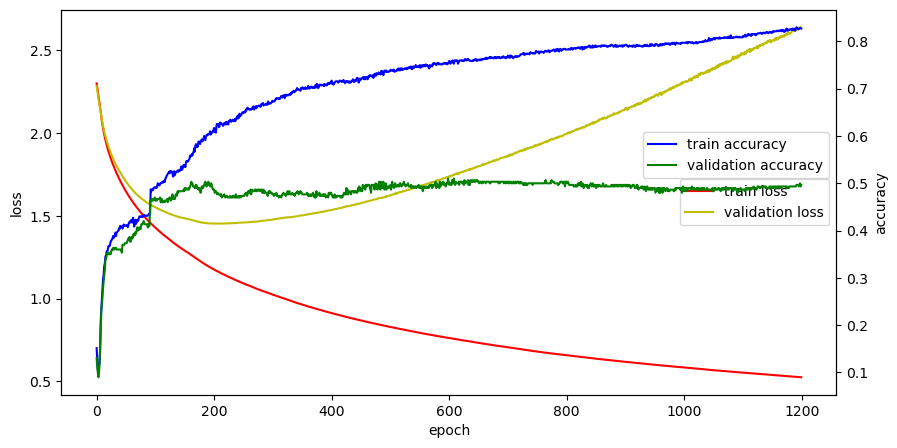

In [35]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수2 - Early Stopping(조기 종료)
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [36]:
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습(콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(patience=2) # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                 validation_data=(X_val,Y_val),
                 callbacks=[earlyStopping])

Epoch 1/1200
7/7 [==============================] - 1s 39ms/step - loss: 2.2996 - accuracy: 0.1043 - val_loss: 2.2943 - val_accuracy: 0.1133
Epoch 2/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2850 - accuracy: 0.1171 - val_loss: 2.2629 - val_accuracy: 0.1733
Epoch 3/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2571 - accuracy: 0.1386 - val_loss: 2.2403 - val_accuracy: 0.1700
Epoch 4/1200
7/7 [==============================] - 0s 8ms/step - loss: 2.2287 - accuracy: 0.1571 - val_loss: 2.2018 - val_accuracy: 0.1667
Epoch 5/1200
7/7 [==============================] - 0s 6ms/step - loss: 2.1803 - accuracy: 0.1686 - val_loss: 2.1547 - val_accuracy: 0.1667
Epoch 6/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.1338 - accuracy: 0.1886 - val_loss: 2.1202 - val_accuracy: 0.2167
Epoch 7/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.0978 - accuracy: 0.2400 - val_loss: 2.0901 - val_accuracy: 0.2167
Epoch 8/1200
7/7 [

7/7 [==============================] - 0s 7ms/step - loss: 1.5955 - accuracy: 0.4186 - val_loss: 1.6671 - val_accuracy: 0.3600
Epoch 60/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5899 - accuracy: 0.4186 - val_loss: 1.6629 - val_accuracy: 0.3533
Epoch 61/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.5850 - accuracy: 0.4200 - val_loss: 1.6593 - val_accuracy: 0.3567
Epoch 62/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.5790 - accuracy: 0.4229 - val_loss: 1.6554 - val_accuracy: 0.3567
Epoch 63/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.5740 - accuracy: 0.4229 - val_loss: 1.6515 - val_accuracy: 0.3533
Epoch 64/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5688 - accuracy: 0.4200 - val_loss: 1.6479 - val_accuracy: 0.3533
Epoch 65/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.5636 - accuracy: 0.4229 - val_loss: 1.6436 - val_accuracy: 0.3667
Epoch 66/1200
7/7 [=======

7/7 [==============================] - 0s 6ms/step - loss: 1.3271 - accuracy: 0.5629 - val_loss: 1.4933 - val_accuracy: 0.4767
Epoch 118/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3229 - accuracy: 0.5600 - val_loss: 1.4903 - val_accuracy: 0.4700
Epoch 119/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3187 - accuracy: 0.5629 - val_loss: 1.4883 - val_accuracy: 0.4733
Epoch 120/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3150 - accuracy: 0.5600 - val_loss: 1.4865 - val_accuracy: 0.4667
Epoch 121/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3113 - accuracy: 0.5643 - val_loss: 1.4846 - val_accuracy: 0.4667
Epoch 122/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3081 - accuracy: 0.5671 - val_loss: 1.4823 - val_accuracy: 0.4700
Epoch 123/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.3050 - accuracy: 0.5643 - val_loss: 1.4807 - val_accuracy: 0.4733
Epoch 124/1200
7/7 [=

Epoch 175/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1559 - accuracy: 0.6057 - val_loss: 1.4193 - val_accuracy: 0.4867
Epoch 176/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1546 - accuracy: 0.5986 - val_loss: 1.4179 - val_accuracy: 0.4900
Epoch 177/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1518 - accuracy: 0.6143 - val_loss: 1.4179 - val_accuracy: 0.4867
Epoch 178/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1495 - accuracy: 0.6057 - val_loss: 1.4181 - val_accuracy: 0.4867
Epoch 179/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1474 - accuracy: 0.6000 - val_loss: 1.4172 - val_accuracy: 0.4867
Epoch 180/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1447 - accuracy: 0.6057 - val_loss: 1.4165 - val_accuracy: 0.4867
Epoch 181/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1439 - accuracy: 0.6143 - val_loss: 1.4158 - val_accuracy: 0.4867
Epoch 

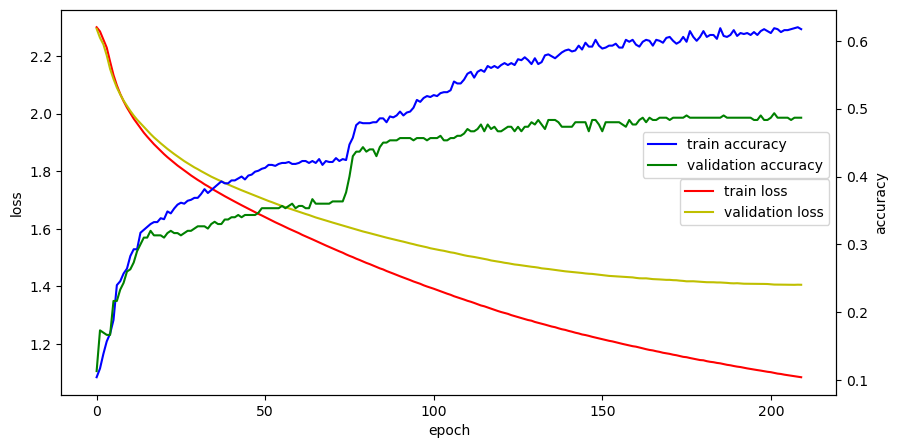

In [37]:
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 레이어
- 활성화 함수 : 은닉층에 주로 relu계열
- optimizer, epoch 등을 조정